In [1]:
import numpy as bp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
#titanic_train = pd.read_csv("data-files/titanic-train.csv")
original_titanic_train = titanic_train.copy()

In [8]:
titanic_train.head(n=5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [9]:
titanic_train.describe() # 수치 데이터에 대한 요약 통계량

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [23]:
na = titanic_train.isnull()
na_sum = na.sum()
na_sum.sort_values(ascending=False)

# na_sum = titanic_train.isnull().sum().sort_values(ascending=False)

na_sum

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [26]:
na_percent = na_sum / na.count()
na_percent = na_percent.sort_values(ascending=False)
na_percent

Cabin          0.771044
Age            0.198653
Embarked       0.002245
Ticket         0.000000
Survived       0.000000
SibSp          0.000000
Sex            0.000000
Pclass         0.000000
PassengerId    0.000000
Parch          0.000000
Name           0.000000
Fare           0.000000
dtype: float64

In [31]:
type(na_sum), type(na_percent)
missing_values = pd.DataFrame({ "TOTAL" : na_sum,
                                "PERCENT" : na_percent})
# missing_values = pd.concat([na_sum, na_percent], 
#                          axis=1, 
#                           keys=["TOTAL", "PERCENT"])
missing_values

,TOTAL,PERCENT
Age,177,0.198653
Cabin,687,0.771044
Embarked,2,0.002245
Fare,0,0.000000
Name,0,0.000000
Parch,0,0.000000
PassengerId,0,0.000000
Pclass,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000


In [36]:
# remove missing value column

# del titanic_train["Cabin"]
# titanic_train.drop("Cabin", axis=1)
titanic _train.drop("Cabin", axis=1, inplace=True)
titanic_train.info()
titanic_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [44]:
# replace missing value by a value

age_mean = titanic_train["Age"].mean()
titanic_train["Age"].fillna(age_mean, inplace=True) #원본 변경
titanic_train.info()
titanic_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [46]:
titanic_train.dropna(axis=0, inplace=True) # missing value 가 포함된 행 제거 (axis=0)
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202 entries, 1 to 889
Data columns (total 12 columns):
PassengerId    202 non-null int64
Survived       202 non-null int64
Pclass         202 non-null int64
Name           202 non-null object
Sex            202 non-null object
Age            202 non-null float64
SibSp          202 non-null int64
Parch          202 non-null int64
Ticket         202 non-null object
Fare           202 non-null float64
Cabin          202 non-null object
Embarked       202 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 20.5+ KB


In [48]:
# df = titanic_train.reset_index() # 인덱스를 새로 만들고 원래 인덱스는 컬럼으로 변경
# df = df.drop("index")
df = titanic_train.reset_index(drop=True) # 인덱스를 새로 만들고 원래 인덱스는 제거
# df.info()
df.head()


,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
1,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
2,6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
3,10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
4,11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [49]:
titanic_train.drop("PassengerId", axis=1, inplace=True)
titanic_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [50]:
titanic_train["FamilySize"] = titanic_train["SibSp"] + titanic_train["Parch"]
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202 entries, 1 to 889
Data columns (total 12 columns):
Survived      202 non-null int64
Pclass        202 non-null int64
Name          202 non-null object
Sex           202 non-null object
Age           202 non-null float64
SibSp         202 non-null int64
Parch         202 non-null int64
Ticket        202 non-null object
Fare          202 non-null float64
Cabin         202 non-null object
Embarked      202 non-null object
FamilySize    202 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 20.5+ KB


In [52]:
titanic_train.drop(["SibSp" , "Parch", "Name", "Ticket"], axis=1, inplace=True)
titanic_train.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,FamilySize
1,1,1,female,38.0,71.2833,C85,C,1
3,1,1,female,35.0,53.1000,C123,S,1
6,0,1,male,54.0,51.8625,E46,S,0
10,1,3,female,4.0,16.7000,G6,S,2
11,1,1,female,58.0,26.5500,C103,S,0


In [65]:
title_column = original_titanic_train['Name'].str.extract('([A-Za-z]+)\.', expand=False) # 영문자1개이상 + . 를 추출
titanic_train["Title"] = title_column 

In [66]:
titanic_train.head(0)

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,FamilySize,Title


In [67]:
titanic_train["Title"].unique()

array(['Mrs', 'Mr', 'Miss', 'Master', 'Dr', 'Mme', 'Major', 'Lady', 'Sir',
       'Mlle', 'Col', 'Capt', 'Countess'], dtype=object)

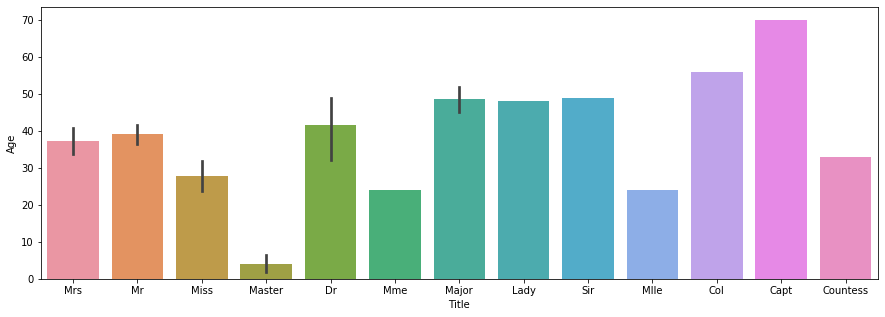

In [69]:
plt.figure(figsize=(15, 5))
sns.barplot(x=titanic_train["Title"], y=titanic_train["Age"])
plt.show()

In [72]:
age_means = titanic_train.groupby("Title")["Age"].mean()
age_means

Title
Capt        70.000000
Col         56.000000
Countess    33.000000
Dr          41.666667
Lady        48.000000
Major       48.500000
Master       3.988571
Miss        27.823875
Mlle        24.000000
Mme         24.000000
Mr          39.068703
Mrs         37.244083
Sir         49.000000
Name: Age, dtype: float64

In [74]:
map_means = age_means.to_dict()
map_means

{'Capt': 70.0,
 'Col': 56.0,
 'Countess': 33.0,
 'Dr': 41.666666666666664,
 'Lady': 48.0,
 'Major': 48.5,
 'Master': 3.988571428571429,
 'Miss': 27.823874680306904,
 'Mlle': 24.0,
 'Mme': 24.0,
 'Mr': 39.06870335230866,
 'Mrs': 37.24408344733242,
 'Sir': 49.0}

In [ ]:
# Age의 missing value를 전체평균으로 대체
# -> Age의 missing value를 Title별 평균으로 대체
row_nan_age = titanic_train['Age'] == original_titanic_train["Age"].mean()
row_nan_age
idx_nan_age = titanic_train[titanic_train['Age'] == original_titanic_train["Age"].mean()].index
#titanic_train.loc[idx_nan_age, 'Age'] = titanic_train['Title'].loc[idx_nan_age].map(map_means)
#titanic_train.head()


In [75]:
idx_nan_age = titanic_train[titanic_train['Age'] == original_titanic_train["Age"].mean()].index
titanic_train.loc[idx_nan_age, 'Age'] = titanic_train['Title'].loc[idx_nan_age].map(map_means)
titanic_train.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,FamilySize,Title
1,1,1,female,38.0,71.2833,C85,C,1,Mrs
3,1,1,female,35.0,53.1000,C123,S,1,Mrs
6,0,1,male,54.0,51.8625,E46,S,0,Mr
10,1,3,female,4.0,16.7000,G6,S,2,Miss
11,1,1,female,58.0,26.5500,C103,S,0,Miss


In [76]:
titanic_train['Imputed'] = 0
titanic_train.loc[idx_nan_age, 'Imputed'] = 1
titanic_train.head(10)

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,FamilySize,Title,Imputed
1,1,1,female,38.000000,71.2833,C85,C,1,Mrs,0
3,1,1,female,35.000000,53.1000,C123,S,1,Mrs,0
6,0,1,male,54.000000,51.8625,E46,S,0,Mr,0
10,1,3,female,4.000000,16.7000,G6,S,2,Miss,0
11,1,1,female,58.000000,26.5500,C103,S,0,Miss,0
21,1,2,male,34.000000,13.0000,D56,S,0,Mr,0
23,1,1,male,28.000000,35.5000,A6,S,0,Mr,0
27,0,1,male,19.000000,263.0000,C23 C25 C27,S,5,Mr,0
31,1,1,female,37.244083,146.5208,B78,C,1,Mrs,1
52,1,1,female,49.000000,76.7292,D33,C,1,Mrs,0


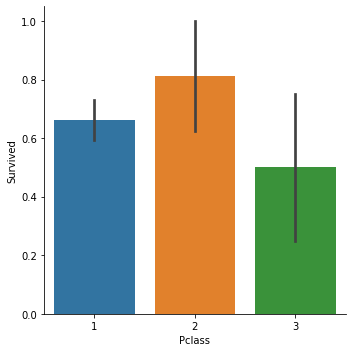

In [84]:
#sns.barplot(titanic_train["Pclass"], titanic_train["Survived"])
sns.catplot(data=titanic_train, x='Pclass', y="Survived", kind='bar')
plt.show()

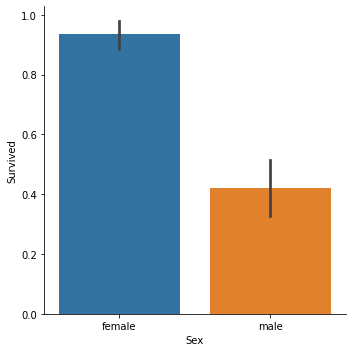

In [85]:
sns.catplot(data=titanic_train, x='Sex', y="Survived", kind='bar')
plt.show()

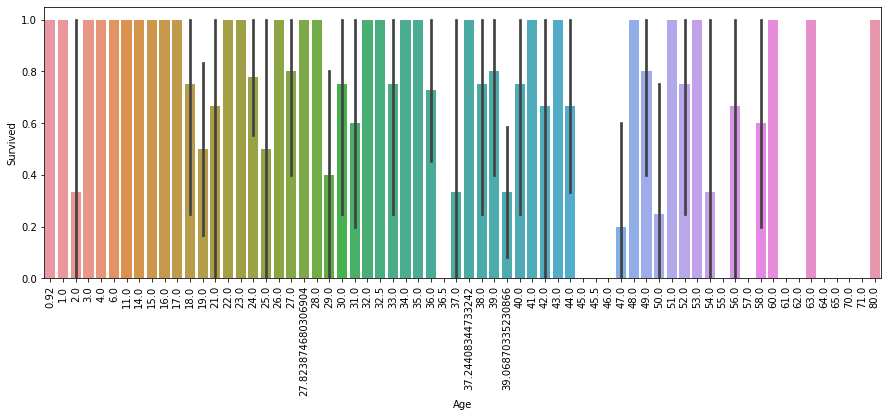

In [87]:
plt.figure(figsize=(15,5))
sns.barplot(titanic_train["Age"], titanic_train["Survived"])
plt.xticks(rotation=90)
plt.show()

In [89]:
titanic_train["AgeGroup"] = pd.cut(titanic_train["Age"], 
                                   bins=[0, 15, 50, 200], 
                                   labels=["Child", "Adult", "elder"])
titanic_train["AgeGroup"].head(10)

1     Adult
3     Adult
6     elder
10    Child
11    elder
21    Adult
23    Adult
27    Adult
31    Adult
52    Adult
Name: AgeGroup, dtype: category
Categories (3, object): [Child < Adult < elder]

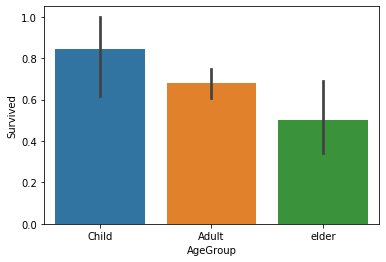

In [90]:
sns.barplot(titanic_train["AgeGroup"], titanic_train["Survived"])
plt.show()

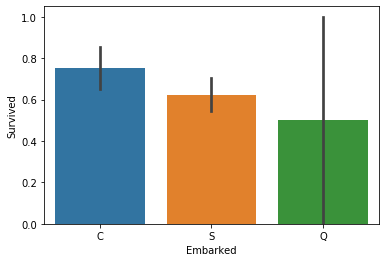

In [91]:
sns.barplot(titanic_train["Embarked"], titanic_train["Survived"])
plt.show()

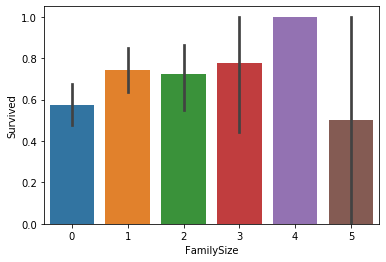

In [92]:
sns.barplot(titanic_train['FamilySize'], titanic_train["Survived"])
plt.show()

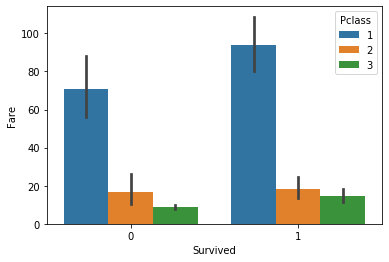

In [93]:
sns.barplot(x=titanic_train["Survived"], 
            y=titanic_train["Fare"],
            hue=titanic_train["Pclass"])
plt.show()